In [1]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pandas.io.json import json_normalize
import gzip
sns.set()

# Read the data


TODO: explain what you did with hdf5 files, and why decided to save to csv


In [2]:
# read the data from previosly created csv files

reviews_df = pd.read_csv('reviews_cellphones.csv')

In [3]:
metadata_df = pd.read_csv('metadata_cellphones.csv')

In [33]:
cols = metadata_df.columns[1:-1]
metadata_df = metadata_df[cols].copy()

In [4]:
ratings_cols = ['reviewerID', 'asin', 'overall', 'unixReviewTime']
ratings_df = pd.DataFrame(pd.read_csv('data/ratings_Cell_Phones_and_Accessories.csv', header=None))
ratings_df.columns = ratings_cols

In [5]:
cols = reviews_df.columns[1:-1]
reviews_df = reviews_df[cols].copy()

In [6]:
reviews_df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime
0,A1EWN6KZ4HMLT7,011040047X,S. Prescott,"[2, 2]","The case pictured is a soft violet color, but ...",1.0,Wrong color,1344902400
1,A1YX2RBMS1L9L,0110400550,Andrea Busch,"[0, 0]",Saw this same case at a theme park store for 2...,5.0,Great product,1353542400
2,A180NNPPKWCCU0,0110400550,Aniya pennington,"[3, 3]",case fits perfectly and I always gets complime...,5.0,Perfect,1374105600
3,A3HVRXV0LVJN7,0110400550,BiancaNicole,"[4, 4]",Best phone case ever . Everywhere I go I get a...,5.0,A++++,1358035200
4,A292527VPX98P8,0110400550,Cebell,"[0, 1]",It may look cute. This case started off pretty...,1.0,Do NOT GET IT!!,1353888000


In [34]:
metadata_df.head()

,asin,related,title,price,salesRank,imUrl,brand,categories
0,0110400550,"{'also_bought': ['B00C56IXFG', 'B008ZUQWOK', '...",Pink &amp; White 3d Melt Ice-cream Skin Hard C...,3.33,{'Cell Phones & Accessories': 83460},http://ecx.images-amazon.com/images/I/31zn6SOL...,NaN,"[['Cell Phones & Accessories', 'Cases', 'Basic..."
1,011040047X,"{'buy_after_viewing': ['B008RU7UL2', 'B00698LY...",Purple Hard Case Cover for Iphone 4 4s 4g with...,1.94,{'Cell Phones & Accessories': 495795},http://ecx.images-amazon.com/images/I/41WCZc2d...,NaN,"[['Cell Phones & Accessories', 'Cases', 'Basic..."
2,0195866479,"{'buy_after_viewing': ['B00530RXP2', 'B004SH9B...",Hello Kitty Light-weighted Chrome Case Black C...,2.94,{'Cell Phones & Accessories': 371302},http://ecx.images-amazon.com/images/I/41fy1%2B...,NaN,"[['Cell Phones & Accessories', 'Cases', 'Basic..."
3,0214514706,"{'buy_after_viewing': ['B0042FV2SI', 'B00869D2...",Cool Summer Breeze in the Ocean Beach Collecti...,0.94,{'Cell Phones & Accessories': 778100},http://ecx.images-amazon.com/images/I/415cmp6Q...,NaN,"[['Cell Phones & Accessories', 'Cases', 'Basic..."
4,0214714705,"{'buy_after_viewing': ['B008EU7HRM', 'B00869D2...",Cool Summer Breeze In The Ocean Beach Collecti...,5.79,{'Cell Phones & Accessories': 654894},http://ecx.images-amazon.com/images/I/41XDwPt2...,NaN,"[['Cell Phones & Accessories', 'Cases', 'Basic..."


In [8]:
ratings_df.head()

,reviewerID,asin,overall,unixReviewTime
0,A1EWN6KZ4HMLT7,011040047X,1.0,1344902400
1,A1YX2RBMS1L9L,0110400550,5.0,1353542400
2,A180NNPPKWCCU0,0110400550,5.0,1374105600
3,A3HVRXV0LVJN7,0110400550,5.0,1358035200
4,A292527VPX98P8,0110400550,1.0,1353888000


# Descriptive statistics

TODO:
 - basic histograms and charts
 - Sort by timestamps, and check again the stats?
 - Check how many people gave the comments
 

## Reviews df

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f741392bf28>]], dtype=object)

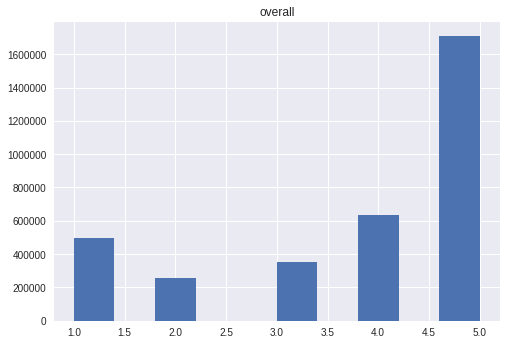

In [11]:
reviews_df.hist('overall')

In [26]:
print ("Shape: ", reviews_df.shape)
print ("Ratings values: ", reviews_df.overall.unique())
print ("Min review unix time: ", reviews_df.unixReviewTime.min())
print ("Max review unix time: ", reviews_df.unixReviewTime.max())
unique_reviewers = reviews_df['reviewerID'].unique()
unique_reviewers_percent = len(unique_reviewers) / reviews_df.shape[0] *100
unique_products = reviews_df['asin'].unique()
unique_products_percent = len(unique_products) / reviews_df.shape[0] *100
print ("Percentage of unique reviewers: ", unique_reviewers_percent )
print ("Percentage of unique products: ", unique_products_percent)


#print ("Distribution of time per months eg? Or few months: ")


Shape:  (3447249, 8)
Ratings values:  [ 1.  5.  2.  3.  4.]
Min review unix time:  942796800
Max review unix time:  1406073600
Percentage of unique reviewers:  65.5898369975595
Percentage of unique products:  9.273423532793831


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f73b3417128>]], dtype=object)

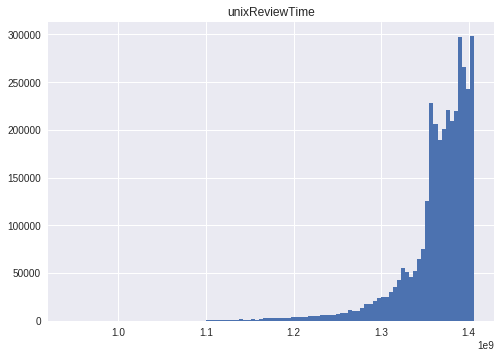

In [31]:
reviews_df.hist(column='unixReviewTime', bins=100)

## Metadata df

In [65]:
null_price = metadata_df.price.isnull().sum()
null_price_percent = null_price / metadata_df.shape[0] *100
null_brand = metadata_df.brand.isnull().sum()
null_brand_percent = null_brand / metadata_df.shape[0] *100
print ("Shape: ", metadata_df.shape)
print ("Percentage of null prices: ", null_price_percent)
print ("Percentage of null brands: ", null_brand_percent)

Shape:  (346793, 8)
Percentage of null prices:  18.4098294948
Percentage of null brands:  77.3873751777


We conclude that we need to deterimine the exact brand, as most of the brands are unknown. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f73b117b390>]], dtype=object)

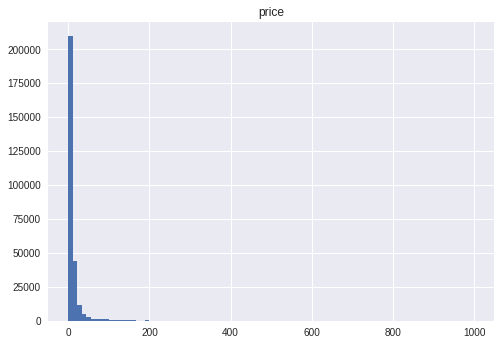

In [47]:
metadata_df.hist(column='price', bins=90)

In [55]:
# ^ something is not fine with the prices, seems like too much of the prices are 0
# but when we count, around 18% of the prices is null
# TODO: determine the brands
# TODO: find the average price per brand